<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [113]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [114]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

9### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [115]:
data = np.concatenate((X,y.reshape(1,-1).T),axis=1)
np.random.shuffle(data)
train_data = data[:(60*len(data))//100]
cv_data = data[(60*len(data))//100:(80*len(data))//100]
test_data = data[(80*len(data))//100:]

print(train_data.shape)
print(cv_data.shape)
print(test_data.shape)

(3000, 6)
(1000, 6)
(1000, 6)


In [116]:
train_X, train_Y= train_data[:,:-1],train_data[:,-1]
cv_X, cv_Y= cv_data[:,:-1],cv_data[:,-1]
test_X, test_y= test_data[:,:-1],test_data[:,-1]

In [117]:
clf = SVC(kernel='rbf',gamma=0.001,C=100)
clf.fit(train_X,train_Y)

SVC(C=100, gamma=0.001)

In [118]:
def rbf_kernal_sim(x1,x2):
    return np.exp(-0.001*np.linalg.norm(x1-x2)**2)
    

In [119]:
def decision_function(cv_X,alphas,support_vectors,intercept):
    dec_func = []
    for idx in range(len(cv_X)):
        res = 0
        for i in range(len(alphas)):
            res += (alphas[i]*rbf_kernal_sim(support_vectors[i],cv_X[idx]))
        res += intercept
        dec_func.extend(res)

    return np.array(dec_func)


In [120]:
fcv = decision_function(cv_X,clf.dual_coef_[0],clf.support_vectors_,clf.intercept_)
fcv

array([-1.98314242e+00, -3.40364471e+00, -3.97507866e+00, -2.53652008e+00,
       -4.23368674e+00,  1.81889916e+00, -4.08128983e+00,  2.06102302e+00,
       -3.61626904e+00, -1.73554473e+00, -3.17658288e+00, -3.06564993e+00,
       -2.43179486e+00, -1.13425445e+00,  1.65505183e+00,  1.75364987e+00,
       -2.89037361e+00, -2.24319359e+00, -3.38878780e+00, -3.01372667e+00,
       -4.07764278e+00, -3.28810640e+00, -3.31587397e+00, -3.03429580e+00,
       -3.84171961e+00, -2.37991919e+00, -1.99996435e+00,  1.78771811e+00,
       -2.50044069e+00, -9.00779968e-01, -3.96309080e+00, -1.79135602e+00,
       -4.19890101e-01, -8.15625221e-01, -3.39653637e+00,  1.38409794e+00,
       -2.55295261e+00, -4.03813715e+00,  1.24866552e+00,  1.21093941e+00,
       -2.89611227e+00,  1.57189120e+00, -2.07015140e+00, -2.29213684e+00,
       -4.06681807e+00, -2.76114215e+00, -3.11426297e+00, -1.89198157e+00,
       -2.62753289e+00, -5.75686751e-01,  2.13303379e+00, -2.69684985e+00,
       -2.28017793e+00,  

In [121]:
clf_fcv = clf.decision_function(cv_X)
clf_fcv

array([-1.98314242e+00, -3.40364471e+00, -3.97507866e+00, -2.53652008e+00,
       -4.23368674e+00,  1.81889916e+00, -4.08128983e+00,  2.06102302e+00,
       -3.61626904e+00, -1.73554473e+00, -3.17658288e+00, -3.06564993e+00,
       -2.43179486e+00, -1.13425445e+00,  1.65505183e+00,  1.75364987e+00,
       -2.89037361e+00, -2.24319359e+00, -3.38878780e+00, -3.01372667e+00,
       -4.07764278e+00, -3.28810640e+00, -3.31587397e+00, -3.03429580e+00,
       -3.84171961e+00, -2.37991919e+00, -1.99996435e+00,  1.78771811e+00,
       -2.50044069e+00, -9.00779968e-01, -3.96309080e+00, -1.79135602e+00,
       -4.19890101e-01, -8.15625221e-01, -3.39653637e+00,  1.38409794e+00,
       -2.55295261e+00, -4.03813715e+00,  1.24866552e+00,  1.21093941e+00,
       -2.89611227e+00,  1.57189120e+00, -2.07015140e+00, -2.29213684e+00,
       -4.06681807e+00, -2.76114215e+00, -3.11426297e+00, -1.89198157e+00,
       -2.62753289e+00, -5.75686751e-01,  2.13303379e+00, -2.69684985e+00,
       -2.28017793e+00,  

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [122]:
no_pos = np.count_nonzero(cv_Y==1.0)
no_neg = len(cv_Y) - no_pos

y_pos = ((no_pos + 1)/(no_neg+2))
y_neg = (1/(no_neg+2))

print(y_pos,y_neg)

0.4166666666666667 0.0014124293785310734


In [123]:
def initialise(dim):
    A = np.zeros_like(dim,dtype=float)
    B = 0
    return A,B

In [124]:
A,B = initialise(1)
print(A,B)

0.0 0


In [125]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [126]:
def log_loss(y_pred,y_true):
    N = len(X)
    tot = 0
    for i in range(len(fcv)):
        tot += y_true[i]*np.log10(y_pred[i]) + (1-y_true[i])*np.log10(1-y_pred[i])
    tot = -1*tot
    return tot/N

In [127]:
def gradient_dA(x,y,A,B,alpha,N):
    dA = x*(y - sigmoid(A*x+B)) - (alpha*A)/N
    return dA

In [128]:
def gradient_dB(x,y,A,B):
    dB = y - sigmoid(A*x+B)
    return dB

In [129]:
ycv = []
for data_point in cv_Y:
    # print(data_point)
    if data_point > 0:
        ycv.append(y_pos)
    else:
        ycv.append(y_neg)
ycv = np.array(ycv)

In [130]:
def calibrate_prob(fcv,ycv,epochs,eta0,alpha):

    epoch_no = []
    train_loss = []

    A,B = initialise(fcv[0])
    for epoch in range(epochs):
        
        for ith_data in range(len(fcv)):
            dA_loss = gradient_dA(fcv[ith_data],ycv[ith_data],A,B,alpha,len(fcv))
            dB_loss = gradient_dB(fcv[ith_data],ycv[ith_data],A,B)
            A = A + (eta0*dA_loss)
            B = B + (eta0*dB_loss)
        
        y_train_pred = [sigmoid(A*data_point+B) for data_point in fcv]
        
        epoch_no.append(epoch)
        train_loss.append(log_loss(y_train_pred,ycv))

    return A,B,epoch_no,train_loss



In [131]:
eta0=0.0001
alpha=0.0001
N=len(fcv)
epochs=50
A,B,epoch_no,train_loss = calibrate_prob(fcv,ycv,epochs,eta0,alpha)

In [132]:
print(A,B)

0.711996697862362 -0.8016514411125536


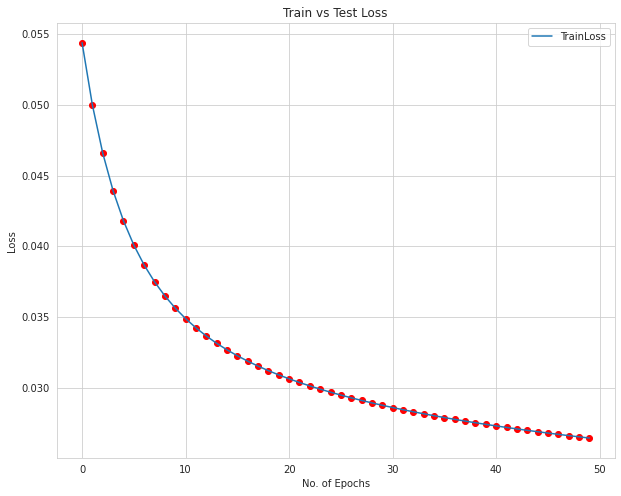

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.scatter(epoch_no,train_loss,color='red')
plt.plot(epoch_no,train_loss,label='TrainLoss')
plt.title("Train vs Test Loss")
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()